$$
\newcommand{\fudm}[2]{\frac{\mathrm{D} #1}{\mathrm{D} #2}}
\newcommand{\pad}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\ppad}[2]{\frac{\partial^2 #1}{\partial #2^2}}
\newcommand{\ppadd}[3]{\frac{\partial^2 #1}{\partial #2 \partial #3}}
\newcommand{\nnabla}{\nabla^2}
\newcommand{\eps}{\epsilon}
\newcommand{\vdetail}[1]{\vb{#1}=\begin{pmatrix}#1_1\\#1_2\\#1_3\end{pmatrix}}
\newcommand{\vb}[1]{\mathbf{#1}}
\newcommand{\va}[1]{\vec{#1}}
\newcommand{\tb}[1]{\underline{\underline{\mathbf{#1}}}}
\newcommand{\fud}[2]{\frac{\mathrm{d} #1}{\mathrm{d} #2}}
$$

# Euler Method for Pathline Calculations

In the previous lecture we showed how to solve analyticaly for the pathline from a given velocity field $\vb{u}(\vb{x},t)$. There we have to solve the ordinary differential equation (ODE)

$$\fud{\vb{X}}{t}=\vb{u}(\vb{x},t)\tag{1}$$.

This may be possible for some simple flow fields, for flow fields which are obtained experimentally or which are more complex (speak non-linear) we are left with an approximate solution of the ODE.

In this chapter we'll have a look into a numerical method to calculate the pathline using the Euler Method. It is based on the idea that differential can be approximated by a finite difference, i.e.

$$\fud{\vb{X}}{t}=\lim_{\Delta t\rightarrow 0}\frac{\vb{X}(t+\Delta t)-\vb{X}(t)}{\Delta t}\tag{2}$$.

$$\fud{\vb{X}}{t}\simeq\frac{\vb{X}(t+\Delta t)-\vb{X}(t)}{\Delta t}=\fud{\vb{X}}{t}+O(\Delta t)\tag{3}$$

The very right hand side of above equation states that we make at maximum an error of order $\Delta t$ by introducing the finite difference approximation. This fact can be derived using a Taylor series approximation.

The Euler method utilizes the observation of Euler that for small enough time steps $\Delta t$ the differential equation can be approximated by the finite difference. Although we do not obtain the exact solution, we may be sufficiently close to it if the time step is sufficiently small (we keep it here with the vague formulation).

We can now write one forward time step in components

\begin{eqnarray}
X_1(t+\Delta t) & = X_1(t)+\Delta t \, u_1(X_1(t),X_2(t),X_3(t),t) \tag{4}\\
X_2(t+\Delta t) & = X_2(t)+\Delta t \, u_2(X_1(t),X_2(t),X_3(t),t) \tag{5}\\
X_3(t+\Delta t) & = X_3(t)+\Delta t \, u_3(X_1(t),X_2(t),X_3(t),t) \tag{6}
\end{eqnarray}



Before we start with implementing the Euler method we need to provide a function which returns the velocity at the position $\vb{x}$. We define this function <code>velocity(x1,x2,t)</code> below.

The velocity field we want to plot is

\begin{eqnarray}
u_1 & = & g x_1 - \omega x_2 \tag{7}\\
u_2 & = & -g x_1 + \omega x_2 \tag{8}
\end{eqnarray}

where $g$ and $\omega$ are constants. 

In [24]:
#standard boilerplate for Python
%matplotlib inline 
import numpy as np
import matplotlib.pylab as plt
import math

#This is our velocity function
def velocity(x1, x2, t):
    omega = 1
    g = 0.5
    u1 = g*x1-omega*x2
    u2 = -g*x2+omega*x1

    return u1, u2

Now we put the Euler Method to work:

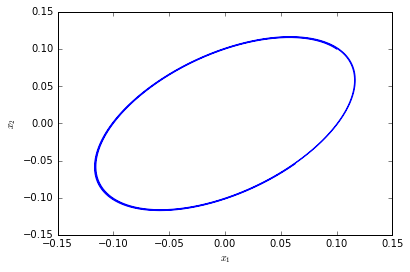

In [28]:
nt = 10000 #number of steps
deltat = 0.002 #step size

x10 = 0.1 #initial position 
x20 = 0.1
x1 = np.zeros(nt) #thats where we store the result
x2 = np.zeros(nt)
x1[0] = x10  #insert the initial conditions
x2[0] = x20

for n in range(nt-1):
    t = deltat*n
    u1, u2 = velocity(x1[n],x2[n],t) #get velocity at that position 

    #This is the Euler step
    x1[n+1] = x1[n]+deltat*u1 #update the position
    x2[n+1] = x2[n]+deltat*u2

plt.plot(x1,x2);
plt.xlabel('$x_1$'),plt.ylabel('$x_2$');


The flow field should return closed pathlines, you can check by reducing the time steps that better approximations are achieved.

The Euler method assumes that the velocity is not changing during the step, yet the velocity is a continous function of space and time. Therefore the step size needs to be small, to keep also the these changes in the velocity field small. We can now improve the Euler method, by using not the velocity of the initial point in space $\vb{x}(t)$, but by using the average of the velocity at point $\vb{x}(t+\Delta t)$. Thus we make a step with 

$$\vb{x}(t+\Delta t)=\vb{x}(t)+\Delta t\,\vb{u}_{avg}\tag{9}$$

where the average velocity is

$$\vb{u}_{avg}=\frac{1}{2}\left(\vb{u}(\vb{x},t)+\vb{u}(\vb{x},t+\Delta t)\right).\tag{10}$$


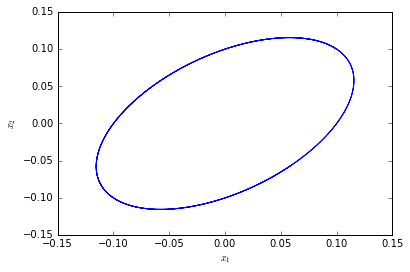

In [27]:
nt=1000 #number of steps
deltat=0.02 #step size

x10=0.1 #initial position 
x20=0.1
x1=np.zeros(nt) #thats where we store the result
x2=np.zeros(nt)
x1[0]=x10  #instert the initial conditions
x2[0]=x20

for n in range(nt-1):
    t=deltat*n
    u1,u2=velocity(x1[n],x2[n],t) #get velocity at that position
    
    #what would be the velocity at the new position
    x1_pred=x1[n]+deltat*u1 
    x2_pred=x2[n]+deltat*u2
    u1_pred,u2_pred=velocity(x1_pred,x2_pred,t) 
    
    #a better approximation is the averaged velocity
    u1_avg=.5*(u1+u1_pred)
    u2_avg=.5*(u2+u2_pred)
    
    #Do the Euler step with the averaged velocity
    x1[n+1]=x1[n]+deltat*u1_avg
    x2[n+1]=x2[n]+deltat*u2_avg
    
    
plt.plot(x1,x2);
plt.xlabel('$x_1$'),plt.ylabel('$x_2$');


Now we achieve closed path lines with the same time stepping but at the costs of one more Euler step per time step.

In [4]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()